In [ ]:
import pandas as pd

data_path = "../Data/"

adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)
adv.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
import numpy as np
# Vi plockar ut sales som Y
Y = sales = adv['sales']
#Antag att regressionen av 'TV' på 'sales' är linjär
# Y ≈ β0 + β1 X
# sales ≈ β0 + β1 × TV
# Modellspecifikation (designmatris), behöver 1 i första kolumnen för β0
X = TV = np.column_stack([np.ones(Y.shape[0]), adv['TV']])
X

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

\begin{equation}
    \boldsymbol{\hat{\beta}} = \mathbf{b} = (X'X)^{-1}X'\mathbf{y}.
\end{equation}

In [ ]:
# pseudo-invers!
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b


array([7.03259355, 0.04753664])

Efter regression får vi en skattare för $y$:

$\hat{y} = \beta_0 + \beta_1x$  

Modellen är alltså $\hat{y} = 7.0325 + 0.0475x$

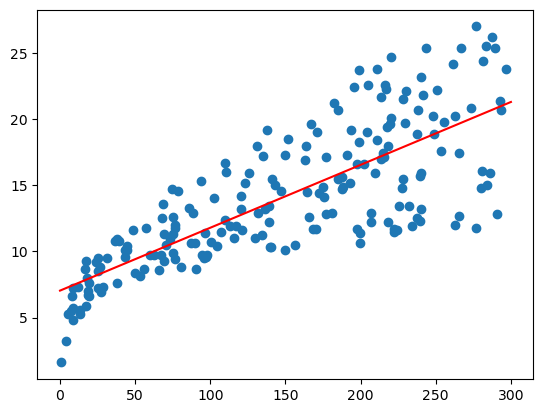

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,1], Y)
x = np.linspace(0,300)
y_hat = b[0] + b[1]*x
plt.plot(x, y_hat, c='red')

In [ ]:
import scipy.stats as stats
n = Y.shape[0]
v = X.shape[1] - 1

SSE = np.sum(np.square(Y - (X @ b)))
var = SSE/(n-v-1)
S = np.sqrt(var) # residual standard error, ie 'deviation' of the regression line

# Regression sum of squares, total variance
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n) # also known as RSS or just 'residuals'
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)

# sum of square errors around the regression line, plus the residuals of the regression itself, is exactly the total variance in the data!
print(SSE+SSR, Syy)

5417.148750000218 5417.14875
